In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
print("done")

done


In [2]:
df = pd.read_csv('https://cocl.us/datascience_survey_data')
df.columns = list(map(str, df.columns))
df.rename(columns={'Unnamed: 0':'Topic'}, inplace = True)
df.set_index('Topic', inplace=True)
df.head()

,Very interested,Somewhat interested,Not interested
Topic,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [3]:
df.sort_values(['Very interested'],ascending=False,axis=0,inplace=True)
df.head()

,Very interested,Somewhat interested,Not interested
Topic,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


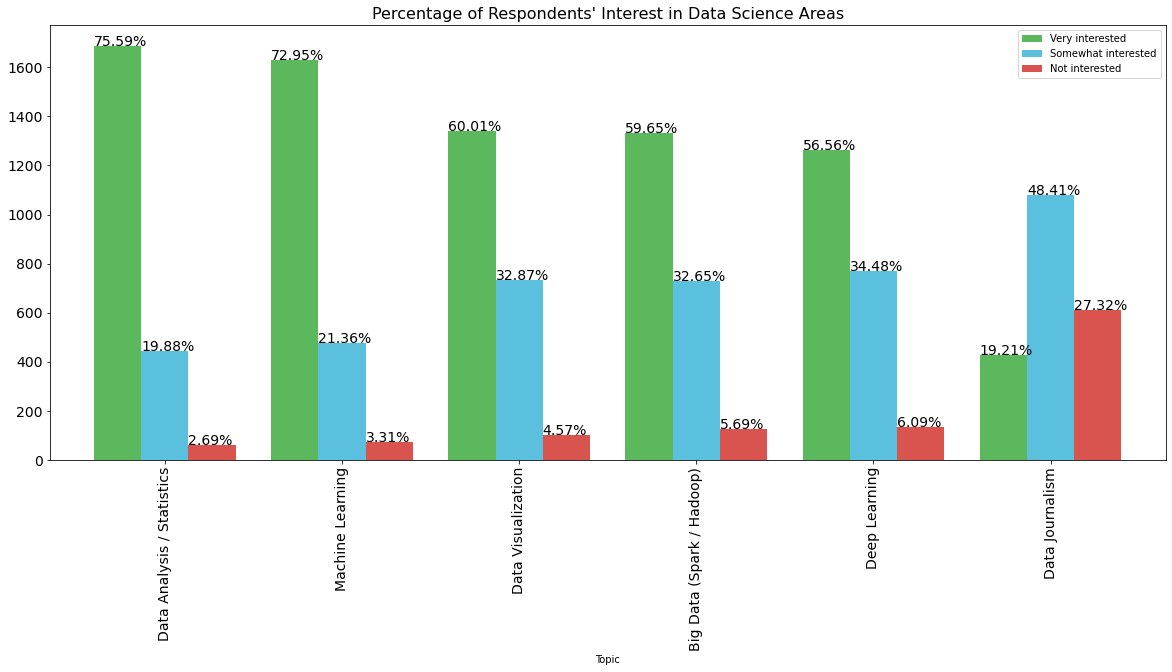

In [4]:

ax = df.plot(kind='bar', figsize=(20,8),width= 0.8,color =['#5cb85c','#5bc0de','#d9534f'], fontsize='14')
plt.title("Percentage of Respondents' Interest in Data Science Areas", fontsize='16')
for a  in ax.patches:
    height = a.get_height()
    width = a.get_width()
    x,y = a.get_xy()
    ax.annotate('{:.2%}'.format(height/2233), (x,y+height), size='14')
plt.show()


In [6]:
df = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [7]:
df.shape

(150500, 13)

In [8]:
df['PdDistrict'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [9]:
df_crime = df.groupby(['PdDistrict'])['PdId'].count().reset_index()
df_crime

,PdDistrict,PdId
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [10]:
df_crime.rename(columns={'PdDistrict':'Neighborhood','PdId':'Count'}, inplace=True)
df_crime


,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [ ]:
!conda install -c conda-forge folium --yes


Solving environment: \ 

In [49]:
import folium
print('done')

done


In [55]:
latitude=37.77
longitude= -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [56]:
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json


In [57]:
geo_json = r'sanfran_geo.json'


In [58]:
sanfran_map.choropleth( geo_data = geo_json,
                      data =df_crime,
                      columns =['Neighborhood','Count'],
                      fill_color ='YlOrRd',
                      fill_opacity= 0.7,
                      line_opacity =0.2,
                      legend_name = 'Crime Rate in Sen Fransisco')
sanfran_map